# TestCase 6

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from create_jsonfile import ask_user,read_config,check_config

# ask_user()
config = read_config(configfile="configs/config6.json")

### Configuration has been read from config.json ###
# dimension : 2
# testcase : 6
# version : 1
# error_estimations : {'param_num': 1}
# gains : {'n_params': 0}


In [3]:
dimension = config["dimension"]
testcase = config["testcase"]
version = config["version"]   
# high_degree = 10

In [4]:
assert testcase == 6
check_config(config)

Config file is valid


## Imports + Load network

In [5]:
# export CUDA_VISIBLE_DEVICES=
import os
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [6]:
from testcases.utils import create_tree

import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [7]:
current_dir = os.getcwd()
repo_dir = os.path.dirname(current_dir)
repo_dir = os.path.dirname(repo_dir)
# vérifier que repo_dir finit bien par "code" (à modifier pour l'utilisateur)
assert repo_dir.split("/")[-1] == "code"

In [8]:
if version == 1:
    from testcases.networks.test_2D.test_6.test_6_v1 import Run_laplacian2D,NonlinearPoisson_2D
else:
    raise ValueError("Version not found")
from testcases.problem.problem_2D import TestCase6
problem = TestCase6(version=version)

Using device: cpu
torch loaded; device is cpu


init
init
>> load network /home/flecourtier/Bureau/Article1/code/networks/test_2D/test_fe6_v1.pth
optimizers loaded
network loaded
Error  tensor([0.0074])


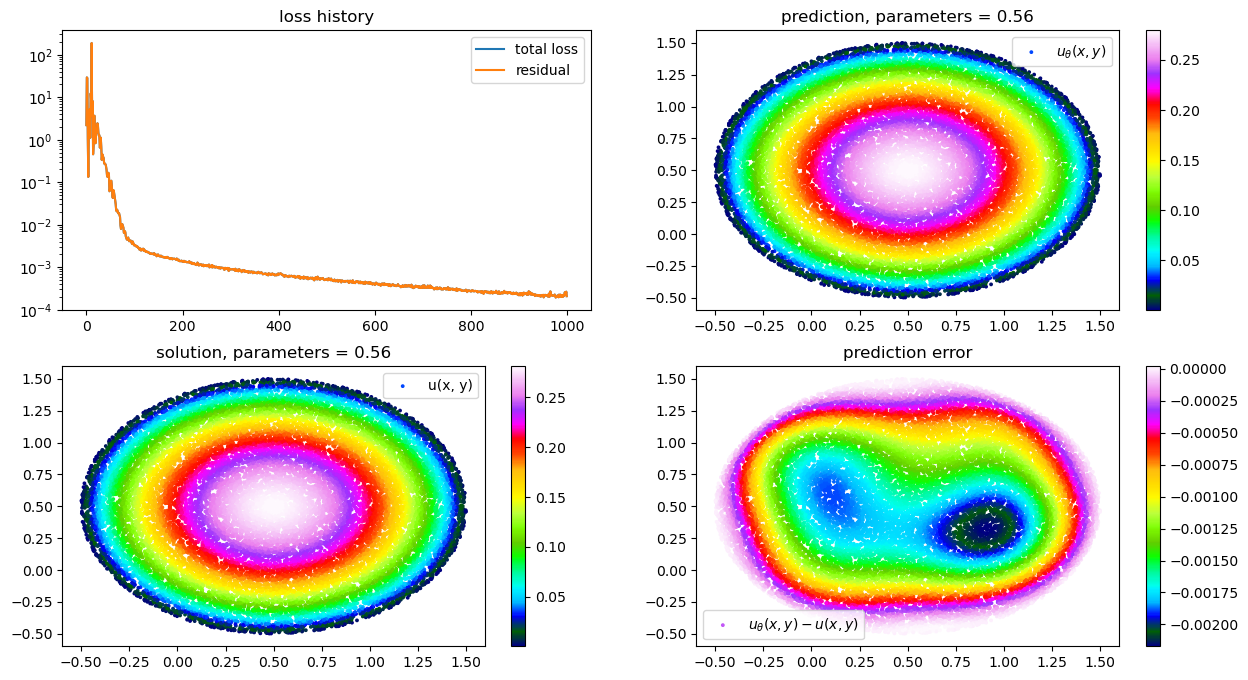

In [9]:
pde = NonlinearPoisson_2D()
trainer,u_theta = Run_laplacian2D(pde)

## Error estimations

### Imports

In [10]:
from modfenics.error_estimations.error_estimations import ErrorEstimations
from modfenics.error_estimations.compare import CompareMethods

hwloc/linux: Ignoring PCI device with non-16bit domain.
Pass --enable-32bits-pci-domain to configure to support such devices
(warning: it would break the library ABI, don't enable unless really needed).


In [11]:
param_num = config["error_estimations"]["param_num"]     
error_estimations = ErrorEstimations(param_num, problem, repo_dir = repo_dir, tab_nb_vert=[32,64,128], tab_degree=[1], save_fig=True)
compare_methods = CompareMethods(error_estimations)
tab_nb_vert = error_estimations.tab_nb_vert

## Results directory: /home/flecourtier/Bureau/Article1/code/results/fenics/test_2D/testcase6/version1/cvg/param1/


### Run FEM

In [12]:
degree = 1
df_FEM, tab_h_FEM, tab_err_FEM = error_estimations.run_fem_deg(degree,new_run=False)

## Read csv file : /home/flecourtier/Bureau/Article1/code/results/fenics/test_2D/testcase6/version1/cvg/param1/FEM_case6_v1_param1_degree1.csv


## Read csv file : /home/flecourtier/Bureau/Article1/code/results/fenics/test_2D/testcase6/version1/cvg/param1/FEM_case6_v1_param1_degree1.csv


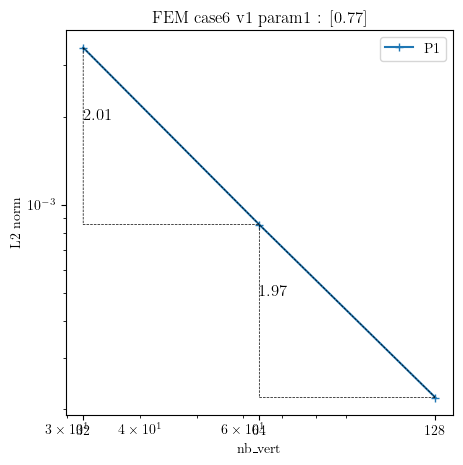

In [13]:
error_estimations.run_fem_alldeg(new_run=False,plot_cvg=True)

### Run Add

In [14]:
# degree = 1
# df_Corr, tab_h_Corr, tab_err_Corr = error_estimations.run_corr_deg(degree,u_theta,new_run=True)

## Read csv file : /home/flecourtier/Bureau/Article1/code/results/fenics/test_2D/testcase6/version1/cvg/param1/Corr_case6_v1_param1_degree1.csv


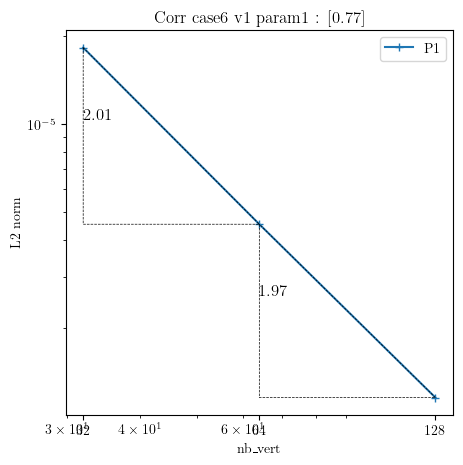

In [15]:
error_estimations.run_corr_alldeg(u_theta,new_run=False,plot_cvg=True)

### Save results

Convergence plots :

/home/flecourtier/Bureau/Article1/code/results/fenics/test_2D/testcase6/version1/cvg/param1/FEM_case6_v1_param1_degree1.csv


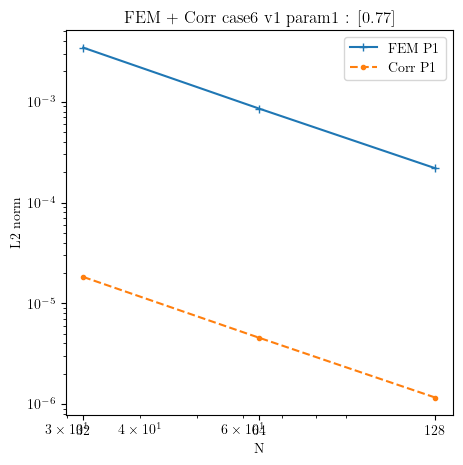

In [16]:
compare_methods.plot_Corr_vs_FEM_alldeg()

In [17]:
compare_methods.save_tab_alldeg_allM()

/home/flecourtier/Bureau/Article1/code/src/modfenics/error_estimations/compare.py:198: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[error_cols] = df[error_cols].applymap(lambda x: f'{x:.2e}')
/home/flecourtier/Bureau/Article1/code/src/modfenics/error_estimations/compare.py:202: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[factor_cols] = df[factor_cols].applymap(lambda x: f'{round(x,2)}')


Reaching a given precision :

In [18]:
from modfenics.error_estimations.compare import CompareMethodsMeshSize,CompareMethodsDoFs
get_N = CompareMethodsMeshSize(error_estimations)
get_dofs = CompareMethodsDoFs(error_estimations)

In [19]:
get_N.save_tab_given_precisions_alldeg_allM()

In [25]:
# get_dofs.save_tab_given_precisions_alldeg_allM(u_theta,tab_M=None)
